<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Привет! Спасибо, что прислал работу во время :) 
    
Меня зовут Евгений, и я буду проверять твой проект) 
Ты проделал большую работу над проектом, однако в любом деле всегда можно можно что-то улучшить. Моя основная цель — не показать, что где—то совершены какие—либо ошибки, а поделиться своим опытом, который поможет тебе в дальнейших работах. Далее в файле ты сможешь увидить мои комментарии, постарайся учесть их при выполнении следующих заданий.    

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

df = pd.read_csv("C:/Users/Ilya/Desktop/Yandex/Projects/04 - Сборный проект/datasets/games.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [38]:
# проверим NAN для Name, чтобы убедиться, что это не Total line
gt = df.query('Name != Name') 
gt

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


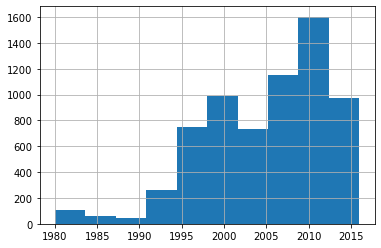

6766

In [39]:
df_3 = df[df['Rating'] != df['Rating']] 
df_3['Year_of_Release'].hist()
plt.show()
len(df_3)

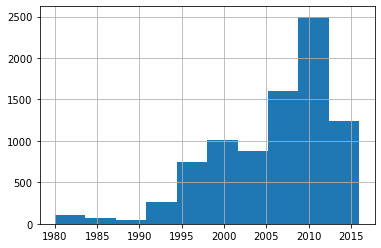

8578

In [40]:
df_1 = df[df['Critic_Score'] != df['Critic_Score']] 
df_1['Year_of_Release'].hist()
plt.show()
len(df_1)

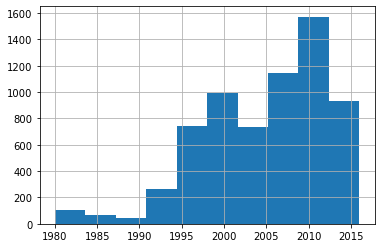

6701

In [41]:
df_2 = df[df['User_Score'] != df['User_Score'] ] 
df_2['Year_of_Release'].hist()
plt.show()
len(df_2)

#### Вывод:
- В данных присуствуют пропуски в следующих столбцах:
    - Name
    - Year_of_release
    - Genre
    - Critic_Score
    - User_Score
    - Rating
 - Пропуски по **Name** можно выкинуть они не представляют существенного количества
    

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Обрати внимание, что мы используем повторяющиеся методы для построения гистограмм. Возникает место для цикла `for`.

</div>

**Шаг 2. Подготовьте данные**

#### • Замените названия столбцов (приведите к нижнему регистру);



In [42]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Здорово, что за одно действие изменил регистр колонок.

</div>

### Прежде чем будем менять данные нам необходимо обработать пропуски
### Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;


In [43]:
df['year_of_release'] = (df.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.mode())))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Лучше всего указать причину изменения пропусков. То есть, мы могли бы изменить в том числе на среднее количество, медиану и так далее. 
    
Как думаешь, реалистична ли замена для года выпуска ? Имею в виду, изменение этих данных может исказить наши дальнейшие выводы.

</div>

#### Уберем пропуски по названиям и напишем для этого функцию

In [44]:
def data_mis(column):
    '''
    Возвращает Series с пропусками в указанной колонке
    '''
    return df[df[column].isnull()]

In [45]:
data_mis('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,NaN,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,NaN,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [46]:
# Данных не много, можно удалить их
df.drop(data_mis('name').index, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


###### Уберем пропуски по году выпуска и напишем для этого функцию

In [47]:
print("Объем пропусков по году выпуска от всего датасета: {:.1%}".format(len(data_mis('year_of_release'))/len(df)))


Объем пропусков по году выпуска от всего датасета: 1.6%


Объем пропусков не такой большой и можно просто выкинуть их, но можно попробовать заполнить

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Перед тем как избавляться от данных, рекомендую их исследовать.

</div>

In [48]:
# сохраним выборку по играм, где нет пропусков в отдельный датасет
non_null_values_year = df[df['year_of_release'].notnull()]

In [49]:
def fill_na_year (row, **kwargs):
    col = 'year_of_release'
    rows = non_null_values_year[non_null_values_year['name'] == row['name']]
    
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [50]:
df['year_of_release'] = df.apply(fill_na_year, axis=1).astype('Int64')


In [51]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Объем снизился, а остальное может удалить

In [20]:
df.drop(data_mis('year_of_release').index, inplace= True)
print('Кол-во строк после удаления: {}'.format(len(df['year_of_release'])))

Кол-во строк после удаления: 16567


#### Уберем пропуски в рейтингах

Заполним неявные пропуски в виде tbd

In [53]:
tbd = df['user_score'] != 'tbd'
df['user_score'].where(tbd, np.nan, inplace = True)


In [54]:
print("Объем пропусков по году выпуска от всего датасета после заполнения: {:.1%}".format(len(data_mis('year_of_release'))/len(df)))


Объем пропусков по году выпуска от всего датасета после заполнения: 0.9%


In [55]:
print("Объем пропусков по рейтингу критиков от всего датасета: {:.1%}".format(len(data_mis('critic_score'))/len(df)))
print("Объем пропусков по рейтингу пользователей от всего датасета: {:.1%}".format(len(data_mis('user_score'))/len(df)))
print("Объем пропусков по рейтингу организации ESRB от всего датасета: {:.1%}".format(len(data_mis('rating'))/len(df)))


Объем пропусков по рейтингу критиков от всего датасета: 51.3%
Объем пропусков по рейтингу пользователей от всего датасета: 54.6%
Объем пропусков по рейтингу организации ESRB от всего датасета: 40.5%


Объем пропусков существенный, но для проверки гипотез должно хватить.
### • Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
#### Столбцы содержат пропуски, поэтому переводим их в nullable тип Int64 и float64


In [58]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = df['user_score'].astype('float64')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Обрати пожалуйста внимание, что мы используем один метод `astype()` к нескольким столбцам. 
    
Рекомендовал бы применять его к списку столбцов, чтобы оптимизировать свои действия.
    
</div>

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

В том числе у нас есть готовый метод `sum()` с атрибутом `axis`=`1`, для подсчета суммарных продаж.    
</div>

### Шаг 3. Проведите исследовательский анализ данных
#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

[Text(0, 0.5, 'Кол-во игр'), Text(0.5, 0, 'Год релиза')]

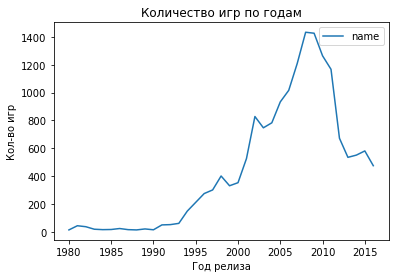

In [25]:
pivot_years = df.pivot_table(index = 'year_of_release', values ='name', aggfunc = 'count')
pivot_years.plot(title = 'Количество игр по годам').set(xlabel = 'Год релиза', ylabel = 'Кол-во игр')

Вывод: 
- Кол-во игр начинает расти с середины 90-х 
- Период до не содержит много данных и не будет на сильно интересовать

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


[Text(0, 0.5, 'Кол-во игр'), Text(0.5, 0, 'Платформа')]

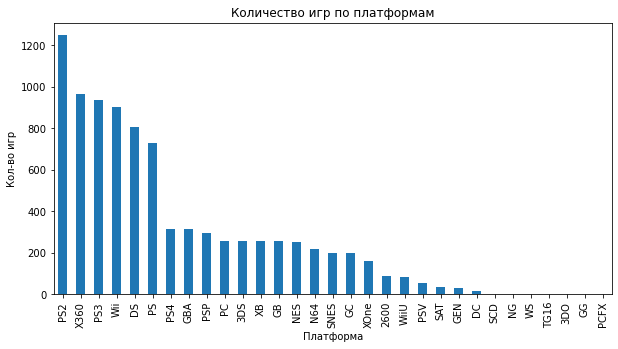

In [26]:
pivot_platform = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

(pivot_platform
                .plot(title = 'Количество игр по платформам',kind='bar', figsize=(10, 5),legend=False)
                .set(xlabel = 'Платформа', ylabel = 'Кол-во игр')
)

In [27]:
top_10_platform = pivot_platform.head(10)
top_10_platform

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


In [28]:
def annual_sales_by_platform(df, plaform_name):
    '''
    Общий продажи по платформе по годам
    '''
    
    return(
        df.query('platform == @plaform_name')
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .sort_values('year_of_release', ascending = False)
    )


#### Построим график общих продаж по топ платформам по годам

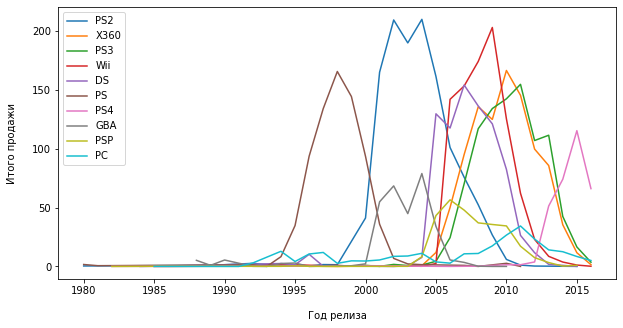

In [29]:
for x in list(top_10_platform.index):
    annual_sales_by_platform(df, x)['total_sales'].plot(figsize = (10,5), label = x)
    plt.xlabel("Год релиза", labelpad=15)
    plt.ylabel("Итого продажи", labelpad=15)
    plt.legend()

**Вывод:**
- На графики видно, что каждая платфома проходит свой жизнный цикл за период около 5 лет по 2,5 года на рост и падение выручки
- На примере PS видно как снижение продаж старой платвормы заменяется выходом новой пока продажи от старой еще не упали до нуля
- Наибольшая концентрация продаж игр по топовым платформам приходит на промежуток 2005-2015 гг., которого нам будет достаточно для дальнейшего анализа, но с учетом сроком жизни платформ анализировать лучше всего актуальные платформы за последние  лет

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Логичные выводы. Хорошо, что автоматизировали график с помощью цикла.
    
Было бы здорово посмотреть на динамику каждой платформы в отдельно.
    
</div>

#### - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

#### - Не учитывайте в работе данные за предыдущие годы. (не очень понятно что это значит?)

In [30]:
df_analyzed_games = df[(df['year_of_release'] < 2016) & (df['year_of_release'] > 2010)]
df_analyzed_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,<NA>,NaN,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60,7.2,E10+,0.01


#### - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


[Text(0, 0.5, 'Кол-во игр'), Text(0.5, 0, 'Платформа')]

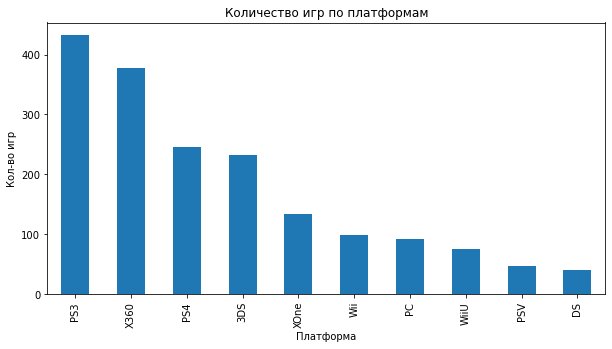

In [31]:
pivot_platform_analyzed_top_10 = df_analyzed_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(10)

(pivot_platform_analyzed_top_10
                .plot(title = 'Количество игр по платформам',kind='bar', figsize=(10, 5),legend=False)
                .set(xlabel = 'Платформа', ylabel = 'Кол-во игр')
)

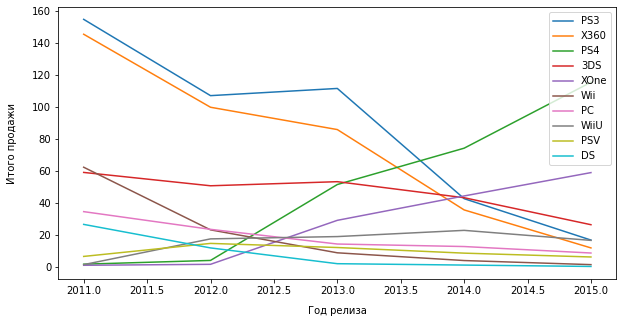

In [32]:
for x in list(pivot_platform_analyzed_top_10.index):
    annual_sales_by_platform(df_analyzed_games, x)['total_sales'].plot(figsize = (10,5), label = x)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Итого продажи", labelpad=15)
    plt.legend()

Вывод:
- Лидерами по продажам являются консоли прошлого поколения PS3 и XBOX360. Это логично ведь присутвуют на рынке дольше чем консоли нового поколения и более распространены среди геймеров. Однако динамика продаж игр для этих платформ стагнирует как и по всем другим за исключением двух консолей нового поколения.
- Продажы игр для консолей нового поколения (за период представленный в датасете), а именно PS4 и XBox One растут

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Трудно не согласиться :)     
</div>

### - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [33]:
selected_platforms = ['PS4','XOne']

Среднее значение общих продаж игр для PS4 : 49.17
Среднее значение общих продаж игр для XOne : 26.80


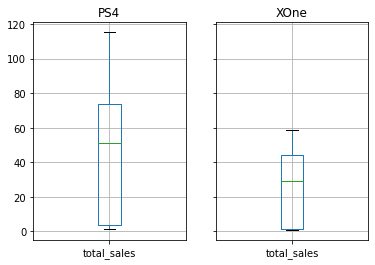

In [34]:
fig, axs = plt.subplots(1, 2 , sharey = True)

for x, platform in enumerate(selected_platforms):
    df = annual_sales_by_platform(df_analyzed_games, platform)
    print("Среднее значение общих продаж игр для",platform,":", "{:.2f}".format(df['total_sales'].mean()))
    df.boxplot('total_sales', ax=axs[x])
    axs[x].set_title(platform)

plt.show()

Вывод:
- Средний объем продаж игр для PS4 превышает продажи XBOX One практически в два раза

### - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [35]:
ps4 = df_analyzed_games.query("platform == 'PS4'")
xbox = df_analyzed_games.query("platform == 'XOne'")

In [36]:
features = ['critic_score','user_score','total_sales']

# Проведем Корреляционный анализ
print('Корреляционный анализ для PS4')
ps4[features].corr()\
.style.background_gradient("RdBu_r")


Корреляционный анализ для PS4


TypeError: float() argument must be a string or a number, not 'NAType'

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Красиво :) 
    
Посмотри в том числе метод `heatmap` в библиотеке `seaborn`. 
    
</div>

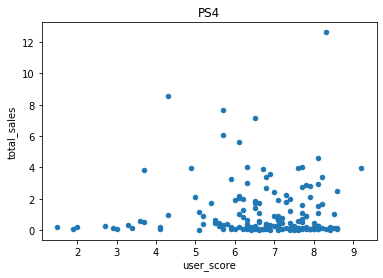

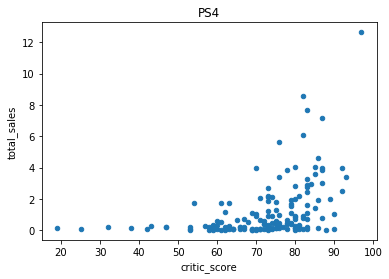

In [33]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
plt.show()

In [34]:
print('Корреляционный анализ для XBOX One')
xbox[features].corr()\
.style.background_gradient("RdBu_r")

Корреляционный анализ для XBOX One


,critic_score,user_score,total_sales
critic_score,1,0.499021,0.462345
user_score,0.499021,1,-0.0343622
total_sales,0.462345,-0.0343622,1


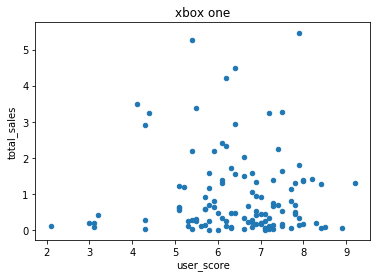

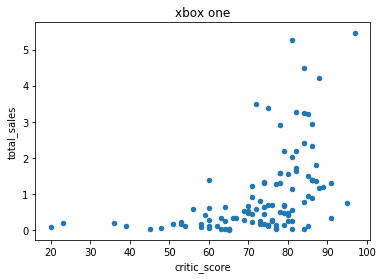

In [35]:
xbox.plot(x='user_score', y='total_sales', kind='scatter', title='xbox one')
xbox.plot(x='critic_score', y='total_sales', kind='scatter', title='xbox one')
plt.show()

Вывод:
- Линейная зависимость между объемом продаж и оценкой критиков есть для обеих платформ, однако она отсуствует для рейтингов пользователей
- При этом есть есть не сильная взаимосвязь между отзывами пользователей и оценкой критиков

### - Соотнесите выводы с продажами игр на других платформах.


In [52]:
from IPython.display import display

In [53]:
features = ['critic_score','user_score','total_sales']

def conclude_other (data, list_of_platform, features):
    
    '''
    Построение матрицы корреляции по указанном датасету, списку платформ и признакам продажи по платформе по годам
    '''   
    
    for platform in list(list_of_platform):
        data_1 = data.query("platform == @platform")
        print('Корреляционный анализ для',platform)
        display(data_1[features].corr()\
        .style.background_gradient("RdBu_r"))
        print()

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Заработало :)
    
---
    
Проблема была в функции `print()`,  которая не выводила красивую таблицу. Рекомендую в не применять его для вывода таблиц.
    
Лучше импортировать вначале проекта метод `display` из библиотеки `IPython.display` и применять его:

---
    
`from IPython.display import display`

`display(df)`
    
---
    
P.s. Добавил методы выше.

    
</div>

In [54]:
# Комментарий для ревьювера: хотел сделать элегантное решение, но не получилось почему-то. 
# Прокомментируйте, пожалуйста, что не так
conclude_other(df_analyzed_games ,pivot_platform_analyzed_top_10.index, features)

Корреляционный анализ для PS3


,critic_score,user_score,total_sales
critic_score,1,0.562589,0.383009
user_score,0.562589,1,0.00423461
total_sales,0.383009,0.00423461,1



Корреляционный анализ для X360


,critic_score,user_score,total_sales
critic_score,1,0.56829,0.389736
user_score,0.56829,1,0.0281066
total_sales,0.389736,0.0281066,1



Корреляционный анализ для PS4


,critic_score,user_score,total_sales
critic_score,1,0.608915,0.432537
user_score,0.608915,1,0.0192199
total_sales,0.432537,0.0192199,1



Корреляционный анализ для 3DS


,critic_score,user_score,total_sales
critic_score,1,0.744259,0.360314
user_score,0.744259,1,0.240305
total_sales,0.360314,0.240305,1



Корреляционный анализ для XOne


,critic_score,user_score,total_sales
critic_score,1,0.499021,0.462345
user_score,0.499021,1,-0.0343622
total_sales,0.462345,-0.0343622,1



Корреляционный анализ для Wii


,critic_score,user_score,total_sales
critic_score,1,0.465967,0.323873
user_score,0.465967,1,0.190432
total_sales,0.323873,0.190432,1



Корреляционный анализ для PC


,critic_score,user_score,total_sales
critic_score,1,0.468382,0.342601
user_score,0.468382,1,-0.0682893
total_sales,0.342601,-0.0682893,1



Корреляционный анализ для WiiU


,critic_score,user_score,total_sales
critic_score,1,0.760811,0.354691
user_score,0.760811,1,0.412432
total_sales,0.354691,0.412432,1



Корреляционный анализ для PSV


,critic_score,user_score,total_sales
critic_score,1,0.722678,0.138109
user_score,0.722678,1,0.0205391
total_sales,0.138109,0.0205391,1



Корреляционный анализ для DS


,critic_score,user_score,total_sales
critic_score,1,0.911969,0.304149
user_score,0.911969,1,0.281029
total_sales,0.304149,0.281029,1


In [38]:
# не элегантное решение для ТОП-5 платформ
data_1 = df_analyzed_games.query("platform == 'PS3'")
print('Корреляционный анализ для PS3')
data_1[features].corr()\
        .style.background_gradient("RdBu_r")

Корреляционный анализ для PS3


,critic_score,user_score,total_sales
critic_score,1,0.562589,0.383009
user_score,0.562589,1,0.00423461
total_sales,0.383009,0.00423461,1


In [39]:
data_2 = df_analyzed_games.query("platform == 'X360'")
print('Корреляционный анализ для X360')
data_2[features].corr()\
        .style.background_gradient("RdBu_r")

Корреляционный анализ для X360


,critic_score,user_score,total_sales
critic_score,1,0.56829,0.389736
user_score,0.56829,1,0.0281066
total_sales,0.389736,0.0281066,1


In [40]:
data_3 = df_analyzed_games.query("platform == '3DS'")
print('Корреляционный анализ для 3DS')
data_3[features].corr()\
        .style.background_gradient("RdBu_r")

Корреляционный анализ для 3DS


,critic_score,user_score,total_sales
critic_score,1,0.744259,0.360314
user_score,0.744259,1,0.240305
total_sales,0.360314,0.240305,1


In [41]:
data_4 = df_analyzed_games.query("platform == 'Wii'")
print('Корреляционный анализ для Wii')
data_4[features].corr()\
        .style.background_gradient("RdBu_r")

Корреляционный анализ для Wii


,critic_score,user_score,total_sales
critic_score,1,0.465967,0.323873
user_score,0.465967,1,0.190432
total_sales,0.323873,0.190432,1


In [42]:
data_4 = df_analyzed_games.query("platform == 'PC'")
print('Корреляционный анализ для PC')
data_4[features].corr()\
        .style.background_gradient("RdBu_r")

Корреляционный анализ для PC


,critic_score,user_score,total_sales
critic_score,1,0.468382,0.342601
user_score,0.468382,1,-0.0682893
total_sales,0.342601,-0.0682893,1


Вывод:
- Вывод для PS3, X360 и PC аналогичный PS4 и XBox One, связь между рейтингами есть, но линейная зависимость есть только между объемом продаж и рейтингами критиков
- Вывод для 3DS и Wii аналогичный PS4 и XBox One, но появляется слабая линейная зависимость между объемом продаж и рейтингами пользователей. Наверное японцы доверяют другу другу больше


### - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

[Text(0, 0.5, 'Общий объем продаж'), Text(0.5, 0, 'Жанр')]

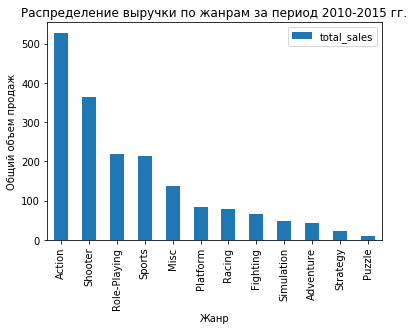

In [43]:
pivot_genres = (df_analyzed_games.pivot_table(index ='genre', values = 'total_sales', aggfunc = 'sum')
                .sort_values('total_sales', ascending = False))
(pivot_genres.plot(y='total_sales', kind='bar', title='Распределение выручки по жанрам за период 2010-2015 гг.').
                    set(xlabel='Жанр', ylabel='Общий объем продаж'))


Вывод:
- Наиболее популярный жанр Action и Shooter. Жизнь людей скучна и всем хочется приключений и снять стресс убив пару монстров

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Верно. 

    
</div>

## Шаг 4. Составьте портрет пользователя каждого региона


### Определите для пользователя каждого региона (NA, EU, JP):
#### - Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [44]:
def popular_by_features (data, feature, region_list):
    
    '''
    Возвращает диаграммы по продажам в регионах по столбцу переданному в feature
    '''

    for region in list(region_list):
        print('Распределение продаж в регионе', region, 'по признаку', feature)
        (data.pivot_table(index = feature, values = region, aggfunc = 'sum').sort_values(region, ascending = False)
         .head(5).plot.pie(y= region, figsize= (6,6), autopct='%1.1f%%',).set(xlabel='', ylabel=''))
        plt.show()


Распределение продаж в регионе na_sales по признаку platform


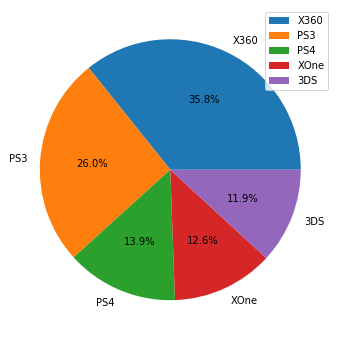

Распределение продаж в регионе eu_sales по признаку platform


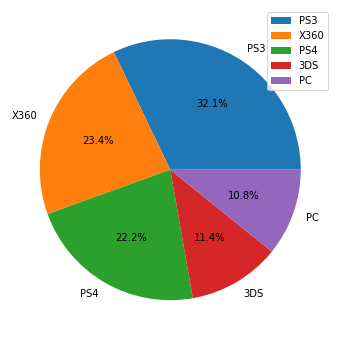

Распределение продаж в регионе jp_sales по признаку platform


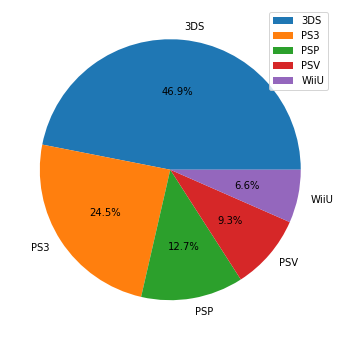

In [45]:
region_list_for = ['na_sales','eu_sales','jp_sales']
popular_by_features(df_analyzed_games, 'platform', region_list_for)

Вывод:
- ТОП-3 платформ в Северной Америка и Европе совпадают, а вот 4 и 5 позиция расходятся полностью. В СА на первом месте консоль от Microsoft может это связано с более активным продвижением на родном рынке. В то время как в Европе на первом месте Play Station
- Рынок Японии сильно отличается от двух других, ТОП-5 платформ являются локальными компаниями. У японцев своей вкус на игры, который отличается от "западного"


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Наглядно и понятно.
    
Визуализация — наш мощный инструмент.
    
Если тебе понравилась тема визуализации, рекомендую посмотреть библиотеки `seaborn` и `plotly`. С ними графики становятся живее и приятнее.

    
</div>

#### - Самые популярные жанры (топ-5). Поясните разницу.


Распределение продаж в регионе na_sales по признаку genre


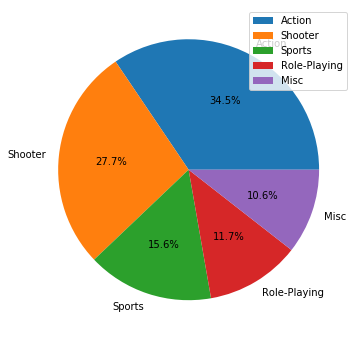

Распределение продаж в регионе eu_sales по признаку genre


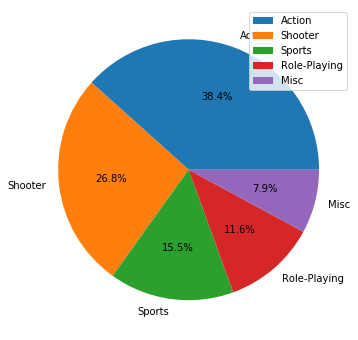

Распределение продаж в регионе jp_sales по признаку genre


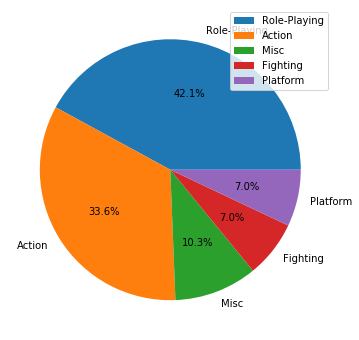

In [46]:
popular_by_features(df_analyzed_games, 'genre', region_list_for)

Вывод:
- Предпочтения пользователй в Северной Америке и Европе по ТОП-5 жанрам совпадают с учетом небольших различий по структуре.
- Предпочтения пользователей из Японии совпадают в трех жанрах, а 4 и 5 жанры присуще только пользователю из Японии

#### - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Распределение продаж в регионе na_sales по признаку rating


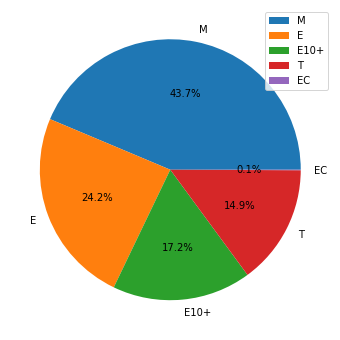

Распределение продаж в регионе eu_sales по признаку rating


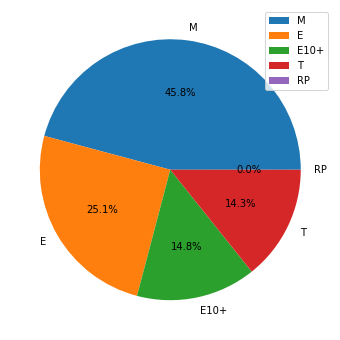

Распределение продаж в регионе jp_sales по признаку rating


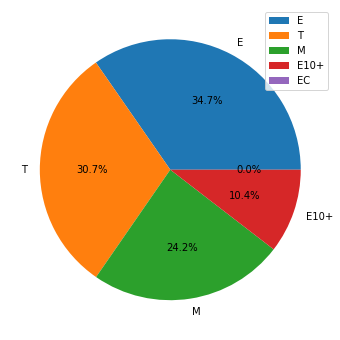

In [47]:
popular_by_features(df_analyzed_games, 'rating', region_list_for)

Вывод:
- Пятый жанр в топ-5 можно не учитывать по каждому из регионов, он слишком маленький
- Предпочтения пользователй в Северной Америке и Европе по ТОП-4 рейтингам совпадают с учетом небольших различий по структуре, аналогично предпочтениям по жанрам. На первом месте везде идет игры для взрослых ('M').
- Предпочтения пользователей из Японии отличаются на первых двух местах у них игры c рейтингом для всех ('E') и подростков ('T'), по середине игры для взрослых ('M') и снова игры для детей.

## Шаг 5. Проверьте гипотезы
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


#### Формулируем гипотезу:
- **H0**: Cредние пользовательские рейтинги платформ Xbox One и PC равны
- **H1**: Средние пользовательские рейтинги платформ Xbox One и PC различаются

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Гипотезы сформулированы верно.
    
</div>

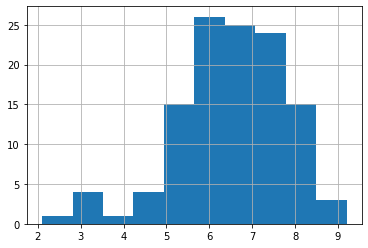

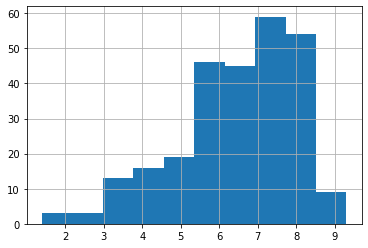

In [48]:
# Рассчитываем средние
average_xbox_one = df_analyzed_games.query("platform == 'XOne'")['user_score'].dropna()
average_pc = df_analyzed_games.query("platform == 'PC'")['user_score'].dropna()
average_xbox_one.hist()
plt.show()
average_pc.hist()
plt.show()

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Не стоит забывать про подписи графиков. 
    
С помощью них быстрее можно понять о чем идет речь, на визуализации.
    
</div>

In [49]:
#проводим тест Стьюдента
alpha = 0.05# Критический уровень статистической значимости

results = st.ttest_ind(
                      average_xbox_one,
                        average_pc) # Проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Значит средние пользовательские рейтинги различаются")
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.8900435256150822
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

В конструкции `if`можно писать условие без скобок. Для логики это неважно, но чем меньше символов в коде — тем легче его читать. Чтобы продемонстрировать коллегам хороший стиль кода, привыкай писать условия без скобок.
    
---
   
В том числе перед проверкой гипотезы, рекомендую проверить различие дисперсий между выборками. Чтобы корректно применять атрибут `equal_var`=`True` (по умолчанию).
    
Когда дисперсии одинаковы, то используем True, наоборот False.
    
</div>

**Вывод:**
- Гипотеза Cредние пользовательские рейтинги платформ Xbox One и PC равны подтвердилась




### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Формулируем гипотезу:
- **H0**: Cредние пользовательские рейтинги жанров Action и Sports равны
- **H1**: Cредние пользовательские рейтинги жанров Action и Sports разные

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Гипотезы сформулированы верно.
    
</div>

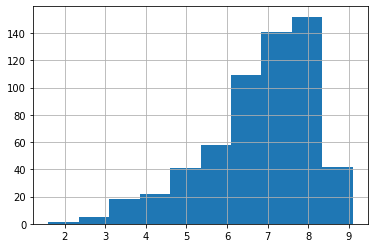

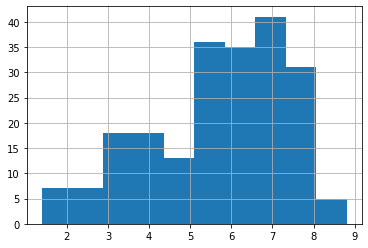

In [50]:
# Рассчитываем средние
average_action = df_analyzed_games.query("genre == 'Action'")['user_score'].dropna()
average_sports = df_analyzed_games.query("genre == 'Sports'")['user_score'].dropna()
average_action.hist()
plt.show()
average_sports.hist()
plt.show()

In [51]:
#проводим тест Стьюдента
alpha = 0.05# Критический уровень статистической значимости

results = st.ttest_ind(
                      average_action,
                        average_sports) # Проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Значит средние пользовательские рейтинги для двух жанров различаются")
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 4.6601925591240026e-21
Отвергаем нулевую гипотезу. Значит средние пользовательские рейтинги для двух жанров различаются


**Вывод:**
- Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные подтвердилась. Практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях очень тяжело





### Шаг 6. Напишите общий вывод


- Средний жизненный цикл платформы составляет около 5 лет.
- Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. Они появились пару лет назад и имеют потенциал роста.
- В США и Европе лучше всего продаются шутеры и экшены.
- Япония специфический локальный рынок с уклоном в портативные консоли и игры для всех и детей
- Больше всего продаж приходятся на игры, разрешенные для детей.

Сформулированные гипотезы подтвердились:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выводы понятны и логичны. Рекомендую разбавлять их выявленными фактами. Так они будут конкретнее. 
    
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.

Успехов тебе в новых работах!
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок первого уровня
  
--- 
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    
</div>